<h1><center>Proiect la Algoritmi genetici</center></h1>

In [21]:
import random, operator, pandas as pd, numpy as np, matplotlib.pyplot as plt


### Creare clasa Oras


In [22]:
class Oras:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distanta(self, oras):
        distanta = np.sqrt((abs(self.x - oras.x) ** 2) + (abs(self.y - oras.y) ** 2))
        return distanta
    
    def __repr__(self):
        return "x: " + str(self.x) + ", y: " + str(self.y) 

### Creare clasa Fitness

In [4]:
class Fitness:
    def __init__(self, ruta):
        self.ruta = ruta
        self.distanta = 0
        self.fitness= 0.0
    
    def distantaRuta(self):
        if self.distanta ==0:
            distantaDrum = 0
            for i in range(0, len(self.ruta)):
                fromOras = self.ruta[i]
                toOras = None
                if i + 1 < len(self.ruta):
                    toOras = self.ruta[i + 1]
                else:
                    toOras = self.ruta[0]
                distantaDrum += fromOras.distanta(toOras)
            self.distanta = distantaDrum
        return self.distanta
    
    def rutaFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.distantaRuta())
        return self.fitness

### Creare populatie

In [5]:
def creareRuta(listaOrase):
    ruta = random.sample(listaOrase, len(listaOrase))
    return ruta

In [6]:
def populatiaInitiala(popSize, listaOrase):
    populatie = []

    for i in range(0, popSize):
        populatie.append(creareRuta(listaOrase))
    return populatie

### Determinare fitness

In [7]:
def clasamentRute(populatie):
    rezultateFitness = {}
    for i in range(0,len(populatie)):
        rezultateFitness[i] = Fitness(populatie[i]).rutaFitness()
    return sorted(rezultateFitness.items(), key = operator.itemgetter(1), reverse = True)

### Selectie

In [8]:
def selectie(popRanked, elita):
    rezultateSelectie = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, elita):
        rezultateSelectie.append(popRanked[i][0])
    for i in range(0, len(popRanked) - elita):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                rezultateSelectie.append(popRanked[i][0])
                break
    return rezultateSelectie

In [9]:
def bazinDeIncrucisare(populatie, rezultateSelectie):
    indiviziSelectati = []
    for i in range(0, len(rezultateSelectie)):
        index = rezultateSelectie[i]
        indiviziSelectati.append(populatie[index])
    return indiviziSelectati

### Incrucisare

In [10]:
def incrucisare(parinte1, parinte2):
    descendent = []
    descendentP1 = []
    descendentP2 = []
    
    genaA = int(random.random() * len(parinte1))
    genaB = int(random.random() * len(parinte1))
    
    startGena = min(genaA, genaB)
    endGena = max(genaA, genaB)

    for i in range(startGena, endGena):
        descendentP1.append(parinte1[i])
        
    descendentP2 = [item for item in parinte2 if item not in descendentP1]

    descendent = descendentP1 + descendentP2
    return descendent

In [11]:
def incrucisarePopulatie(indiviziSelectati, elita):
    descendenti = []
    length = len(indiviziSelectati) - elita
    pool = random.sample(indiviziSelectati, len(indiviziSelectati))

    for i in range(0,elita):
        descendenti.append(indiviziSelectati[i])
    
    for i in range(0, length):
        descendent = incrucisare(pool[i], pool[len(indiviziSelectati)-i-1])
        descendenti.append(descendent)
    return descendenti

### Mutatie

In [12]:
def mutatie(individ, probMutatie):
    for interschimbat in range(len(individ)):
        if(random.random() < probMutatie):
            interschimbatCu = int(random.random() * len(individ))
            
            oras1 = individ[interschimbat]
            oras2 = individ[interschimbatCu]
            
            individ[interschimbat] = oras2
            individ[interschimbatCu] = oras1
    return individ

In [13]:
def mutatiePopulatie(populatie, probMutatie):
    popDupaMutatie = []
    
    for ind in range(0, len(populatie)):
        mutatedInd = mutatie(populatie[ind], probMutatie)
        popDupaMutatie.append(mutatedInd)
    return popDupaMutatie

### Repetitie

In [14]:
def generatiaUrmatoare(generatiaCurenta, elita, probMutatie):
    popRanked = clasamentRute(generatiaCurenta)
    rezultateSelectie = selectie(popRanked, elita)
    indiviziSelectati = bazinDeIncrucisare(generatiaCurenta, rezultateSelectie)
    descendenti = incrucisarePopulatie(indiviziSelectati, elita)
    generatiaUrmatoare = mutatiePopulatie(descendenti, probMutatie)
    return generatiaUrmatoare

### Functie algoritm genetic

In [18]:
def algoritmGenetic(populatie, popSize, elita, probMutatie, generatii):
    pop = populatiaInitiala(popSize, populatie)
    print("Distanta initiala(prima generatie) este: " + str(round(1 / clasamentRute(pop)[0][1])))
    
    for i in range(0, generatii):
        pop = generatiaUrmatoare(pop, elita, probMutatie)
        print("Distanta generatiei " + str(i) + " este: " + str(round(1 / clasamentRute(pop)[0][1])))
    
    print("Distanta finala(ultima generatie) este: " + str(round(1 / clasamentRute(pop)[0][1])))
    print("Coordonatele oraselor in ordinea vizitarii pentru a da ruta ideala: ")
    rutaIdealaIndex = clasamentRute(pop)[0][0]
    rutaIdeala = pop[rutaIdealaIndex]
    return rutaIdeala

### Rulare algoritm

In [19]:
listaOrase = []

for i in range(0,25):
    listaOrase.append(Oras(x=int(random.random() * 200), y=int(random.random() * 200)))

In [20]:
algoritmGenetic(populatie=listaOrase, popSize=100, elita=20, probMutatie=0.01, generatii=500)

Distanta initiala(prima generatie) este: 2262
Distanta generatiei 0 este: 1989
Distanta generatiei 1 este: 1989
Distanta generatiei 2 este: 1983
Distanta generatiei 3 este: 1903
Distanta generatiei 4 este: 1757
Distanta generatiei 5 este: 1757
Distanta generatiei 6 este: 1757
Distanta generatiei 7 este: 1568
Distanta generatiei 8 este: 1701
Distanta generatiei 9 este: 1585
Distanta generatiei 10 este: 1562
Distanta generatiei 11 este: 1562
Distanta generatiei 12 este: 1500
Distanta generatiei 13 este: 1500
Distanta generatiei 14 este: 1545
Distanta generatiei 15 este: 1540
Distanta generatiei 16 este: 1534
Distanta generatiei 17 este: 1445
Distanta generatiei 18 este: 1442
Distanta generatiei 19 este: 1442
Distanta generatiei 20 este: 1442
Distanta generatiei 21 este: 1442
Distanta generatiei 22 este: 1441
Distanta generatiei 23 este: 1420
Distanta generatiei 24 este: 1400
Distanta generatiei 25 este: 1400
Distanta generatiei 26 este: 1400
Distanta generatiei 27 este: 1400
Distanta gen

[x: 15, y: 0,
 x: 26, y: 1,
 x: 19, y: 19,
 x: 69, y: 32,
 x: 100, y: 13,
 x: 150, y: 70,
 x: 174, y: 44,
 x: 195, y: 48,
 x: 168, y: 65,
 x: 162, y: 81,
 x: 178, y: 101,
 x: 199, y: 156,
 x: 149, y: 185,
 x: 138, y: 190,
 x: 76, y: 182,
 x: 77, y: 165,
 x: 54, y: 178,
 x: 37, y: 193,
 x: 50, y: 124,
 x: 59, y: 107,
 x: 66, y: 93,
 x: 50, y: 67,
 x: 45, y: 62,
 x: 2, y: 75,
 x: 16, y: 38]

In [17]:
def algoritmGeneticPlot(populatie, popSize, elita, probMutatie, generatii):
    pop = populatiaInitiala(popSize, populatie)
    progres = []
    progres.append(1 / clasamentRute(pop)[0][1])
    
    for i in range(0, generatii):
        pop = generatiaUrmatoare(pop, elita, probMutatie)
        progres.append(1 / clasamentRute(pop)[0][1])
    
    plt.plot(progres)
    plt.ylabel('Distanta')
    plt.xlabel('Generatia')
    plt.show()

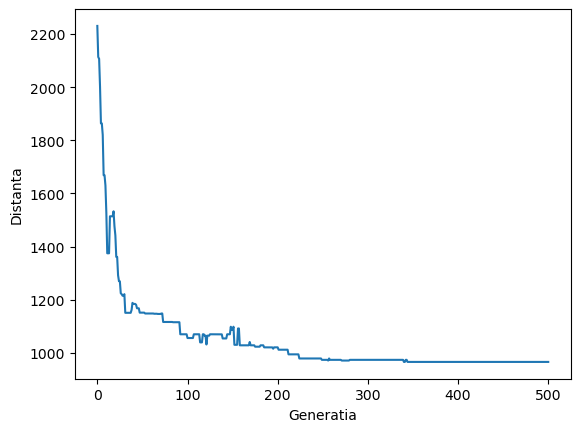

In [19]:
algoritmGeneticPlot(populatie=listaOrase, popSize=100, elita=20, probMutatie=0.01, generatii=500)